In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [136]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

<IPython.core.display.Javascript object>


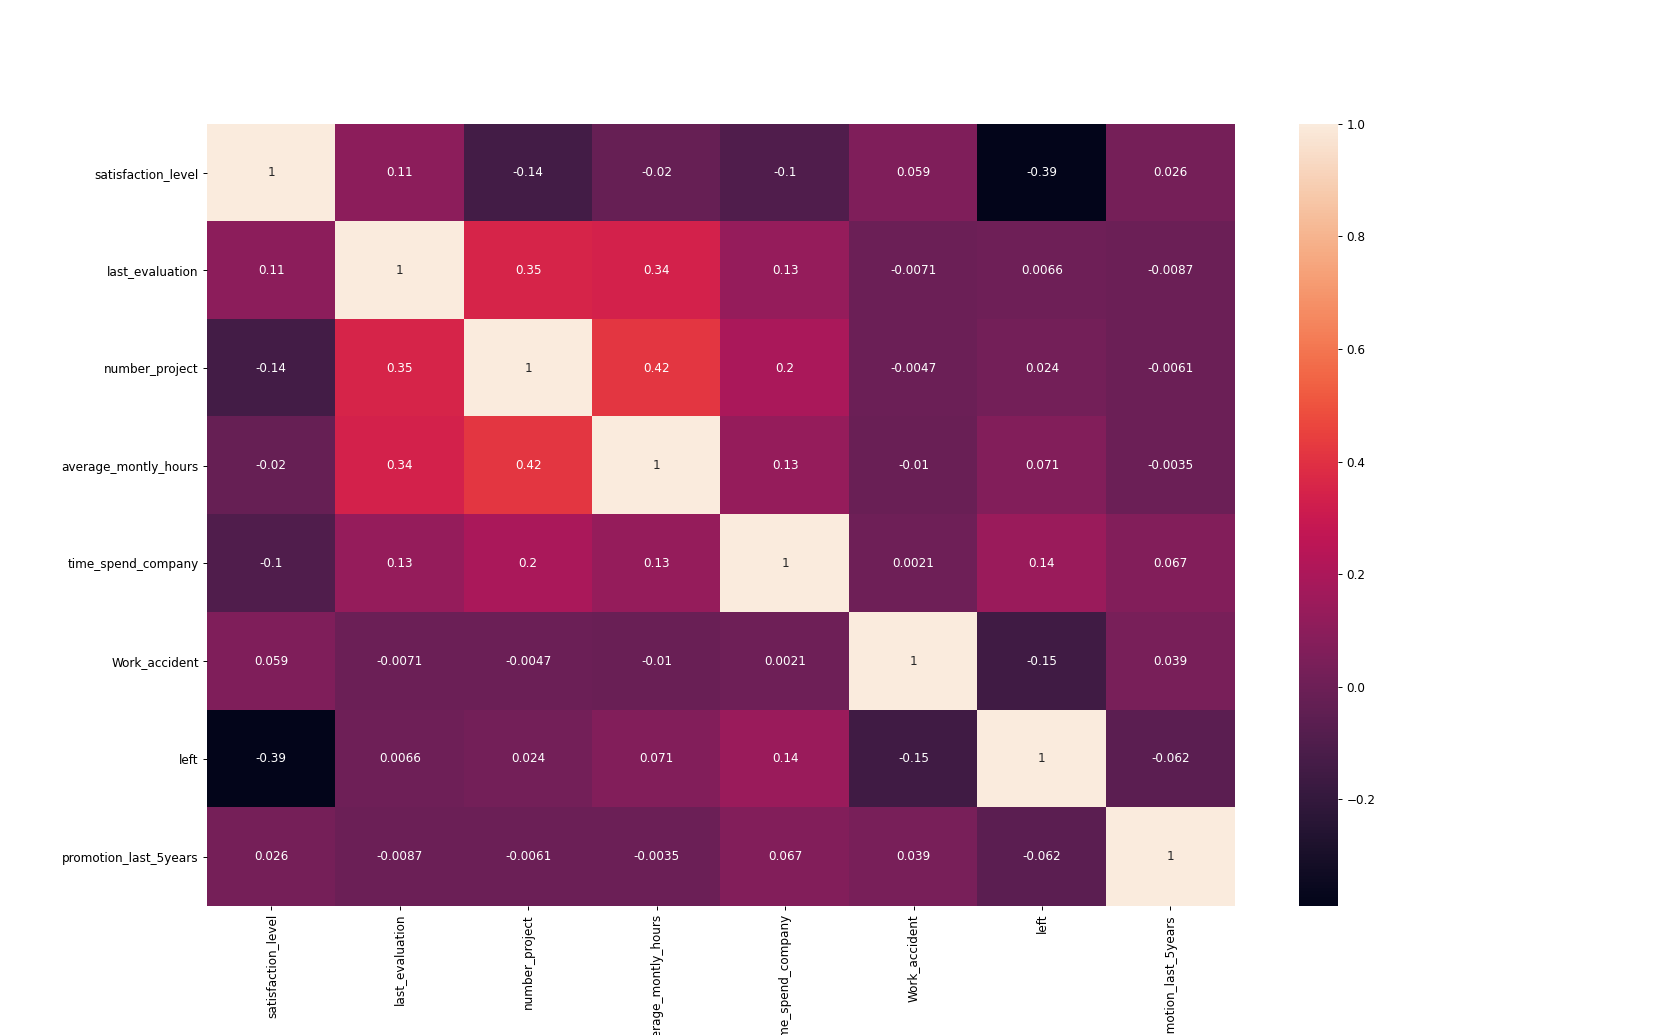

In [137]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot=True,)
plt.show()

In [138]:
left = df[df.left==0]
retained = df[df.left==1]

In [139]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### 1 - Employees having lower satisfaction level are more likely to leave the firm

### 2 - Employees working for more hours are likely to leave the firm than those with less working hours
    
### 3 - Employees promoted are more likely to retain in the company

<IPython.core.display.Javascript object>


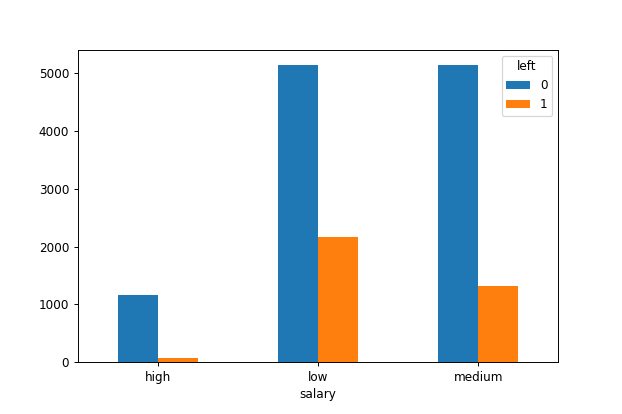

In [140]:
pd.crosstab(df.salary,df.left).plot(kind = "bar")
plt.xticks(rotation = 0)
plt.show()

<h3>Employees who left the firm had lower salaries in comparison</h3>

<IPython.core.display.Javascript object>


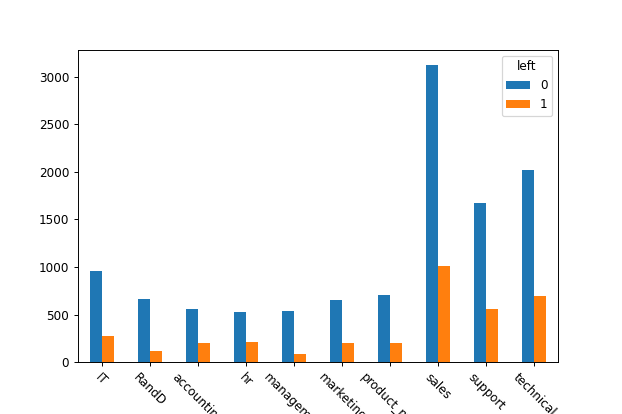

In [141]:
pd.crosstab(df.Department,df.left).plot(kind = "bar")
plt.xticks(rotation = -45)
plt.show()

In [142]:
y = df.left

### Sales is the department with the highest number of employees

### Most number of employees left were from sales department, followed by technical and support

In [143]:
df = df[["satisfaction_level","average_montly_hours","promotion_last_5years","salary"]]
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [144]:
dummies = pd.get_dummies(df.salary,prefix = 'salary')
dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [145]:
df = pd.concat([df,dummies],axis="columns")
df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [146]:
df.drop(columns="salary",inplace = True)

In [149]:
X = df
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7)

In [152]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [153]:
model.fit(X_train,y_train)

LogisticRegression()

In [155]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [156]:
model.score(X_test,y_test)

0.7786666666666666